In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
import pickle
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\Datasets\Japan_used_cars_datasets.csv")

In [3]:
df

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [4]:
df=df.drop('id',axis=1)

In [5]:
df

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...
2313,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            2318 non-null   int64 
 1   mark             2318 non-null   object
 2   model            2318 non-null   object
 3   year             2318 non-null   int64 
 4   mileage          2318 non-null   int64 
 5   engine_capacity  2318 non-null   int64 
 6   transmission     2318 non-null   object
 7   drive            2318 non-null   object
 8   hand_drive       2318 non-null   object
 9   fuel             2318 non-null   object
dtypes: int64(4), object(6)
memory usage: 181.2+ KB


In [7]:
df.shape

(2318, 10)

In [8]:
df.tail()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
2313,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline
2317,1400,toyota,estima t,2005,72320,3000,at,2wd,rhd,gasoline


In [9]:
df.isnull().sum()

price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [10]:
print(df['transmission'].value_counts())
print(df['hand_drive'].value_counts())
print(df['fuel'].value_counts())
print(df['drive'].value_counts())




at     2171
mt      117
cvt      30
Name: transmission, dtype: int64
rhd       2301
lhd         16
center       1
Name: hand_drive, dtype: int64
gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: fuel, dtype: int64
2wd    2121
4wd     192
awd       5
Name: drive, dtype: int64


In [11]:
df['car_name']= df["mark"] +' '+df["model"]


In [12]:
df

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,car_name
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline,nissan march
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline,nissan march
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline,nissan lafesta
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline,toyota avensis
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline,daihatsu mira
...,...,...,...,...,...,...,...,...,...,...,...
2313,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline,toyota vitz
2314,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline,toyota estima
2315,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline,subaru r2
2316,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline,honda z


In [13]:
df.drop(['mark'],axis=1,inplace=True)


In [14]:
df.drop(['model'],axis=1,inplace=True)

In [15]:
df

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,car_name
0,80,2003,80000,1240,at,2wd,rhd,gasoline,nissan march
1,110,2010,53000,1200,at,2wd,rhd,gasoline,nissan march
2,165,2005,47690,2000,at,2wd,rhd,gasoline,nissan lafesta
3,190,2008,130661,1990,at,2wd,rhd,gasoline,toyota avensis
4,190,2006,66300,660,at,2wd,rhd,gasoline,daihatsu mira
...,...,...,...,...,...,...,...,...,...
2313,1400,2009,121000,996,at,2wd,rhd,gasoline,toyota vitz
2314,1400,2003,101000,3000,at,2wd,rhd,gasoline,toyota estima
2315,1400,2005,101000,660,cvt,2wd,rhd,gasoline,subaru r2
2316,1400,2000,170000,660,at,4wd,rhd,gasoline,honda z


In [16]:
df.replace({'transmission':{'at':0,'mt':1,'cvt':2}},inplace=True)
df.replace({'hand_drive':{'rhd':0,'lhd':1,'center':2}},inplace=True)
df.replace({'fuel':{'gasoline':0,'diesel':1,'lpg':2,'hybrid':3,'cng':4}},inplace=True)
df.replace({'drive':{'2wd':0,'4wd':1,'awd':2}},inplace=True)

In [17]:
df

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,car_name
0,80,2003,80000,1240,0,0,0,0,nissan march
1,110,2010,53000,1200,0,0,0,0,nissan march
2,165,2005,47690,2000,0,0,0,0,nissan lafesta
3,190,2008,130661,1990,0,0,0,0,toyota avensis
4,190,2006,66300,660,0,0,0,0,daihatsu mira
...,...,...,...,...,...,...,...,...,...
2313,1400,2009,121000,996,0,0,0,0,toyota vitz
2314,1400,2003,101000,3000,0,0,0,0,toyota estima
2315,1400,2005,101000,660,2,0,0,0,subaru r2
2316,1400,2000,170000,660,0,1,0,0,honda z


In [28]:
df.skew()

price              -0.466780
year               -0.845917
mileage             3.089142
engine_capacity     4.038892
transmission        4.394841
drive               3.193137
hand_drive         12.811470
fuel               12.818733
dtype: float64

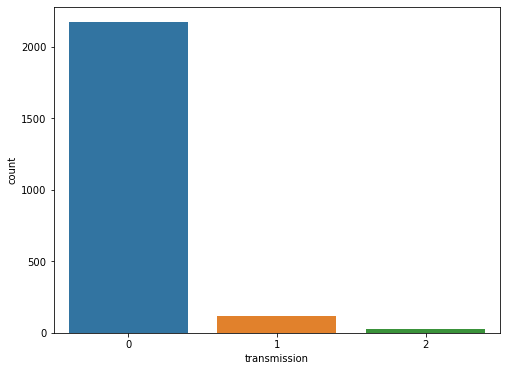

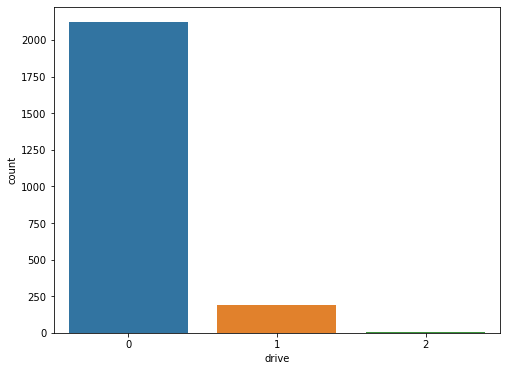

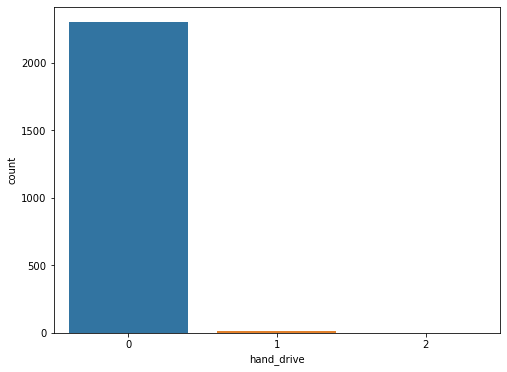

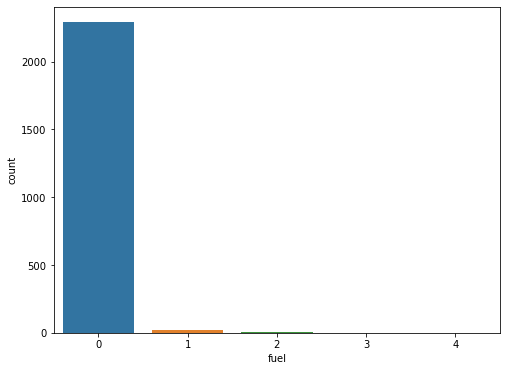

In [31]:
for i in df.columns[4:8]:
    plt.figure(figsize=(8,6))
    sns.countplot(df[i])
plt.show()

In [19]:
df.corr()

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
price,1.000000,-0.211092,0.021581,0.173748,0.022787,0.046591,0.036473,0.044878
year,-0.211092,1.000000,0.086065,-0.142460,-0.234106,-0.241064,-0.107760,-0.051007
mileage,0.021581,0.086065,1.000000,0.130362,0.023681,0.116351,0.001168,0.138592
engine_capacity,0.173748,-0.142460,0.130362,1.000000,-0.107955,0.055608,0.039517,0.082869
transmission,0.022787,-0.234106,0.023681,-0.107955,1.000000,0.161085,0.024400,0.020988
drive,0.046591,-0.241064,0.116351,0.055608,0.161085,1.000000,0.023037,0.002739
hand_drive,0.036473,-0.107760,0.001168,0.039517,0.024400,0.023037,1.000000,0.344691
fuel,0.044878,-0.051007,0.138592,0.082869,0.020988,0.002739,0.344691,1.000000


<AxesSubplot:>

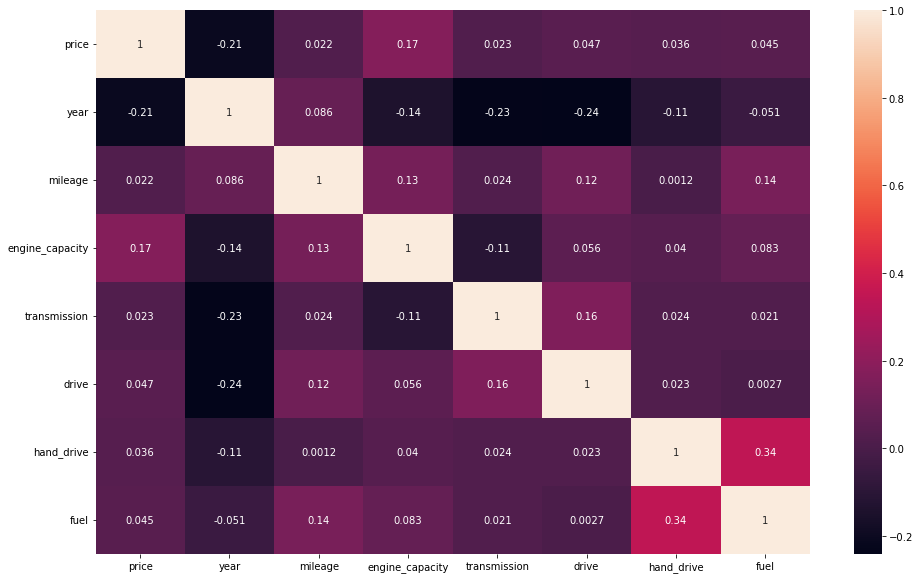

In [20]:
f , ax = plt.subplots(figsize = (16,10))
sns.heatmap(df.corr(),annot=True)

### splitting

In [21]:
X=df.drop(['car_name','price'],axis=1)
Y=df['price']


In [32]:
Y

0         80
1        110
2        165
3        190
4        190
        ... 
2313    1400
2314    1400
2315    1400
2316    1400
2317    1400
Name: price, Length: 2318, dtype: int64

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=1)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2086, 7)
(232, 7)
(2086,)
(232,)


### Model training


In [34]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
accuracy = lr.score(X_test,Y_test)
print(accuracy)


0.06936369599699466


In [35]:
training_data_prediction=lr.predict(X_train)
test_data_prediction=lr.predict(X_test)


### r2 error

In [36]:
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('r2 score-',error_score)

r2 score- 0.06595124550600207


Text(0, 0.5, 'predicted price')

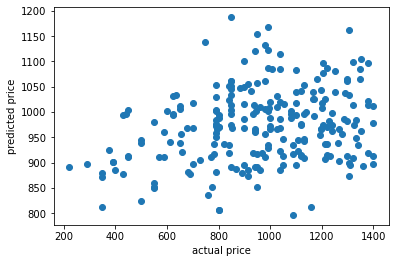

In [37]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')

### lasso

In [38]:
lass=Lasso()
lass.fit(X_train,Y_train)

Lasso()

In [39]:
training_data_prediction=lass.predict(X_train)
test_data_prediction=lass.predict(X_test)


In [40]:
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('r2 score-',error_score)

r2 score- 0.06549866391550951


In [43]:
rfc=RandomForestClassifier(random_state=1,n_jobs=-1,n_estimators=150,criterion='gini')
clf_r=rfc.fit(X_train,Y_train)
Y_pred_r=clf_r.predict(X_test)
acc_r=accuracy_score(Y_test,Y_pred_r)
print('accuracy score is-',acc_r)


accuracy score is- 0.07758620689655173


In [44]:
filename='rfc_glass_model.pkl'
pickle.dump(rfc,open('rfc_glass_model.pkl','wb'))

In [46]:

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.07758620689655173
